In [1]:
import os
import json
from fabrictestbed.slice_manager import SliceManager, Status

In [3]:
credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
print(f"CM Host: {credmgr_host} Orchestrator Host: {orchestrator_host}")

CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


In [4]:
# create and initialize the slice manager

slice_manager = SliceManager(oc_host = orchestrator_host, cm_host = credmgr_host, project_name = 'all', scope = 'all')
slice_manager.initialize()

In [17]:
status, advertised_topology = slice_manager.resources()

print(f"Status: {status}")
if status == Status.OK:
    print(f"Topology: {advertised_topology}")
else:
    print(f"Error: {advertised_topology}")

Status: Status.OK
Topology: UKY: { cpu: 6/6 , core: 172/192 , ram: 1,464/1,536 G, disk: 9,176.0/9,600 G, unit: 3/3 }
	Components:
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		NVME-P4510:  NVME P4510 { disk: 8,000/10,000 G, unit: 8/10 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 379/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 0/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
	Site Interfaces:
		UKY_LBNL: TrunkPort { bw: 100/100 Gbps}
RENC
	Components:
	Site Interfaces:
STAR
	Components:
	Site Interfaces:
LBNL: { cpu: 6/6 , core: 176/192 , ram: 1,484/1,536 G, disk: 9,412.0/9,600 G, unit: 3/3 }
	Components:
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 379/381 }
		NVME-P4510:  NVME P4510 { disk: 8,000/10,000 G, unit: 8/10 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 0/2 }
		SmartNIC-ConnectX-5:  SmartNIC Co

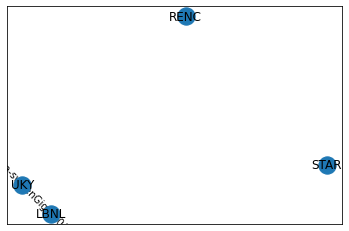

In [18]:
if status == Status.OK:
    advertised_topology.draw()

In [7]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, ComponentModelType, ServiceType
# Create topology
t = ExperimentTopology()

# Add node
n1 = t.add_node(name='n1', site='LBNL')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=6, disk=10)

# Set Properties
n1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Add PCI devices
n1.add_component(ctype=ComponentType.NVME, model='P4510', name='c1')

# Add node
n2 = t.add_node(name='n2', site='LBNL')

# Set properties
n2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')


# Dedicated Cards
n1.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='n1-nic1')
n2.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_5, name='n2-nic1')

# L2Bridge Service
t.add_network_service(name='bridge1', nstype=ServiceType.L2Bridge, interfaces=t.interface_list)

# Generate Slice Graph
slice_graph = t.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice-l2bridge-ded-untag', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")

Response Status Status.OK
Reservations created [{
    "graph_node_id": "5031f4be-0b8f-42df-8360-0ec8bc87823d",
    "lease_end": "2021-08-09 21:24:21",
    "pending_state": "None_",
    "reservation_id": "5b57abba-cbb2-4236-b615-c57665828e6b",
    "reservation_state": "Unknown",
    "slice_id": "548eb377-4b65-4f69-bf5c-56a4b2a4ce62"
}, {
    "graph_node_id": "659fc0e9-5b1a-4743-a3d2-570ace9747e4",
    "lease_end": "2021-08-09 21:24:21",
    "pending_state": "None_",
    "reservation_id": "7fc4d6b5-44b5-46ab-a599-7cb635fbc6b5",
    "reservation_state": "Unknown",
    "slice_id": "548eb377-4b65-4f69-bf5c-56a4b2a4ce62"
}, {
    "graph_node_id": "91ff66d1-3eb6-4a21-9b73-461ed1ed9c6e",
    "lease_end": "2021-08-09 21:24:21",
    "pending_state": "None_",
    "reservation_id": "c21c38e0-ac43-4472-a813-4d67b9a9c15a",
    "reservation_state": "Unknown",
    "slice_id": "548eb377-4b65-4f69-bf5c-56a4b2a4ce62"
}]


In [20]:
status, slices = slice_manager.slices()

In [21]:
x = ExperimentTopology()

# Add node
node1 = x.add_node(name='node1', site='UKY')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=6, disk=10)

# Set Properties
node1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Add PCI devices
node1.add_component(ctype=ComponentType.NVME, model='P4510', name='c1')

# Add node
node2 = x.add_node(name='node2', site='LBNL')

# Set properties
node2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')


# Add node
node3 = x.add_node(name='node3', site='UKY')

# Set properties
node3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Shared Cards
node1.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='node1-nic1')
node2.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='node2-nic1')
node3.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='node3-nic1')

# L2STS Service
x.add_network_service(name='sts1', nstype=ServiceType.L2STS,
                      interfaces=[node1.interface_list[0], node2.interface_list[0], node3.interface_list[0]])


# Specify VLAN
for i in x.interface_list:
    if_labels = i.get_property(pname="labels")
    if_labels.vlan = "200"
    i.set_properties(labels=if_labels)

# Generate Slice Graph
slice_graph = x.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice-sts-ded-tag', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")

Response Status Status.OK
Reservations created [{
    "graph_node_id": "30f48851-3122-423f-9718-b54c5636b52c",
    "lease_end": "2021-08-09 21:15:53",
    "pending_state": "None_",
    "reservation_id": "90309038-67bc-4b29-a462-10518d51fb8d",
    "reservation_state": "Unknown",
    "slice_id": "67d22585-1b36-45ff-ae92-1ca271ab1050"
}, {
    "graph_node_id": "7b71f114-626e-4a49-8b77-1b86a5b3c62b",
    "lease_end": "2021-08-09 21:15:53",
    "pending_state": "None_",
    "reservation_id": "76dfa15d-ba3b-4a73-a2ba-b7eab94628e1",
    "reservation_state": "Unknown",
    "slice_id": "67d22585-1b36-45ff-ae92-1ca271ab1050"
}, {
    "graph_node_id": "d390e441-ed3d-4b25-8dc5-016361615e43",
    "lease_end": "2021-08-09 21:15:53",
    "pending_state": "None_",
    "reservation_id": "9ad29965-78ae-4569-8741-0c93d58e251a",
    "reservation_state": "Unknown",
    "slice_id": "67d22585-1b36-45ff-ae92-1ca271ab1050"
}, {
    "graph_node_id": "ad357ce9-5f05-41bf-91c0-c8e57c25b151",
    "lease_end": "2021